# Описание данных:
- product_id - Идентификатор купленного продукта;
- quantity - Количество купленных единиц товара;
- name - Имя покупателя;
- data - Дата покупки;

In [2]:
import pandas as pd
import os

# Сборка всех данных из папки data в один датафрэйм, имеющий следующие столбцы: 
- колонки из самих файлов (product_id, quantity)
- имя пользователя (name)
- дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)


In [3]:
os.listdir('data')

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [4]:
os.getcwd()

'C:\\Users\\Сергей\\AppData\\Local\\Programs\\Python\\Python38-32\\Scripts\\Karpov'

In [5]:
# Задаём путь к папкам для прогулки в переменную path
#path = r'C:\\Users\\Сергей\\AppData\\Local\\Programs\\Python\\Python38-32\\Scripts\\Karpov\\data'
path = 'data'

In [6]:
# Создаём пустой Df, который будем конкатенировать с другими DF
df = pd.DataFrame()

# Цикл прогулки по папкам: os.walk(path) гуляет по всем вложенным в путь папкам, возвращая кортеж из трёх элементов
# эти элементы это - current_path (путь до папки), dirs - папки, которые там содержатся, files - файлы, которые там
for current_path, dirs, files in os.walk(path):
    
    # Для файлов в files делаем цикл
    for file in files:
        
        # Путь, для чтения df задаём через путь к папке + сам файл
        data_path = (current_path + '/' + file)
        
        # Буферный df обозначаем temp_df и задаём ему путь для чтения
        temp_df = pd.read_csv(data_path)
        
        # Задаём новые колонки: Разделяем строку по '\\' на три части. Индекс [1] = Дата, индекс [2] = Имя
        current_path.split('\\')
        
        # Присваиваем значения df:
        temp_df['name'] = current_path.split('\\')[2]
        temp_df['data'] = current_path.split('\\')[1]
        
        # Конкатинируем изначальный df c новым, который появился
        df = pd.concat((df,temp_df))
        
        

In [7]:
# Дропнем колонку с ненужным индексом:
df.drop(columns='Unnamed: 0',inplace=True)

In [8]:
# Сделаем индексацию заново
df.reset_index(drop=True,inplace = True)

In [9]:
df.data = pd.to_datetime(df.data)

# Определение пользователя, который купил больше всего товаров. Если их несколько, то перечислим имена через запятую с пробелом и в алфавитном порядке.



In [10]:
df

,product_id,quantity,name,data
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


Группируем по имени, агрегируем по количеству купленных товаров, считая их сумму, сортируем по убыванию

In [23]:
df.groupby('name',as_index=True) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity',ascending=False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


Ответ: Alexey_Smirnov, Petr_Smirnov

# Найдём топ-10 товаров по числу проданных единиц за всё время и построим барплот

**Найдём количество проданных единиц товара с product_id==56?**

Строим топ товаров по продажам:

In [31]:
top_ten_prod = df.groupby('product_id',as_index=False).count().loc[:,['product_id','quantity']] \
    .sort_values('quantity',ascending=False)
top_ten_prod.head(10)

,product_id,quantity
27,34,5
22,27,5
46,66,4
42,56,4
45,64,4
21,24,4
12,15,4
51,74,4
26,33,4
66,94,4


Строим барплот:

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

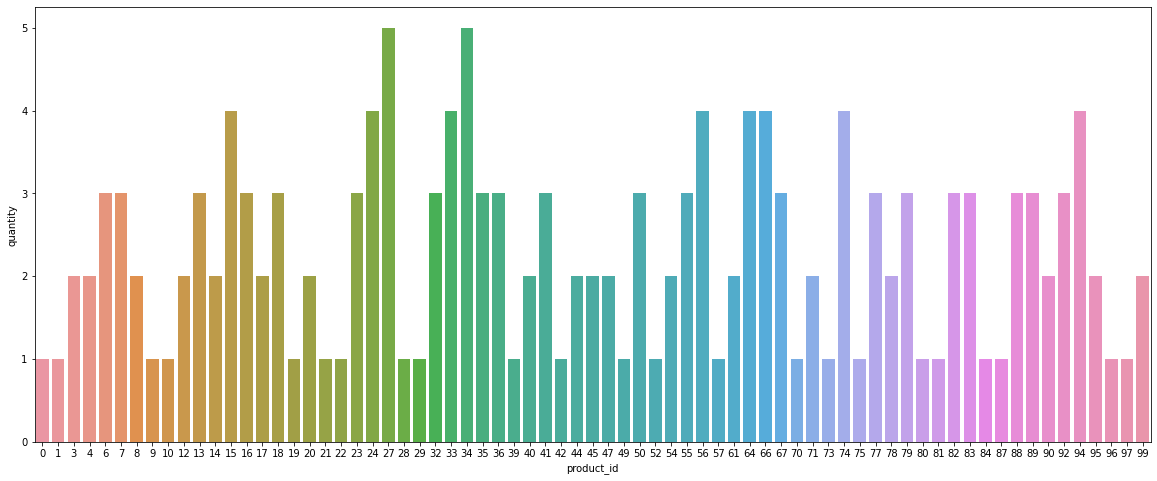

In [30]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x='product_id',y='quantity',data=top_ten_prod,orient='v')

In [368]:
top_ten_prod[top_ten_prod['product_id']==56]

,product_id,quantity
42,56,4


# Визуализируем продажи по дням

In [369]:
sels_to_date = df.groupby('data',as_index=False) \
    .agg({'quantity':'sum'})
sels_to_date['data'] = sels_to_date['data'].dt.strftime('%A')
sels_to_date

,data,quantity
0,Thursday,60
1,Friday,113
2,Saturday,61
3,Sunday,15
4,Monday,94
5,Tuesday,68
6,Wednesday,69


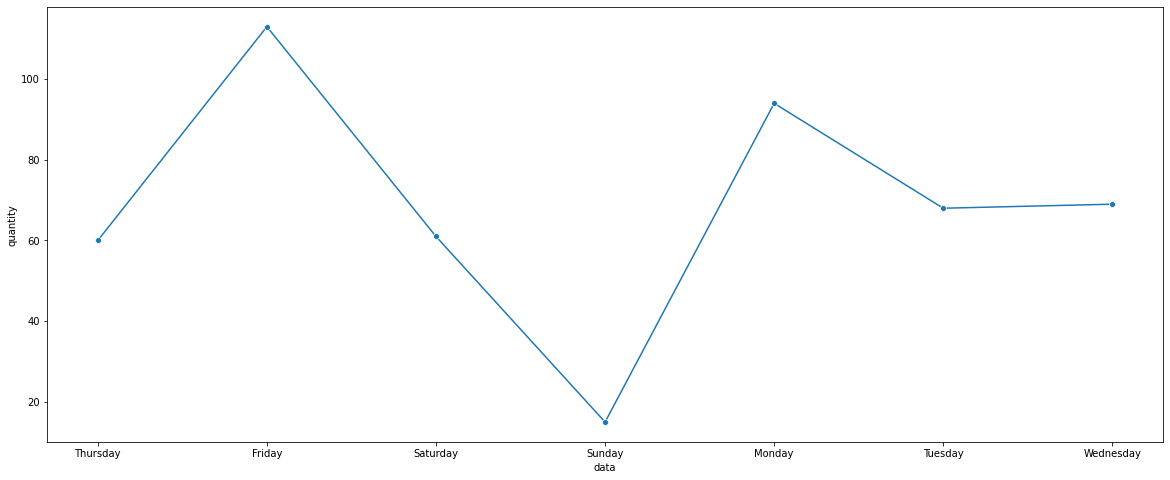

In [377]:
plt.figure(figsize = (20,8))
sns.lineplot(x = 'data',y='quantity',data=sels_to_date,marker='o');

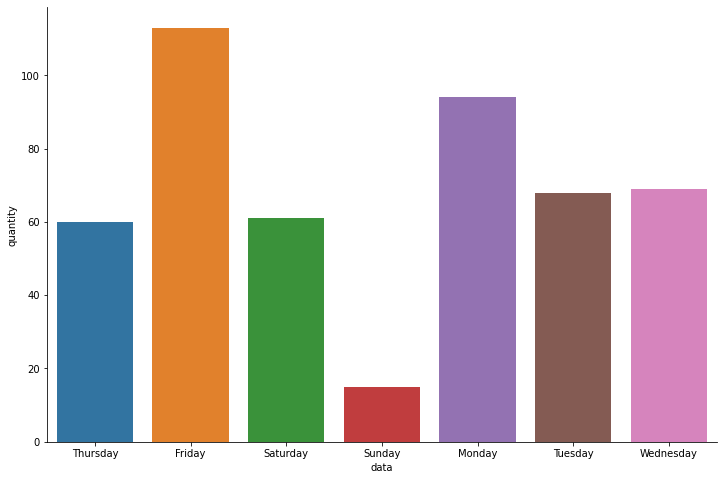

In [373]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data=sels_to_date,x='data',y='quantity')
sns.despine()

# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
*Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.*

Группируем людей по имени и product_id, агрегируем по дате с аргументом nunique.  
После этого, в графе дата будет показано, в сколько уникальных дат, пользователь совершил покупку данного товара.   
После этого, обрезаем таблицу по логическому условию, чтобы число уникальных дат было больше 1  

In [374]:
unique = df.groupby(['name','product_id'],as_index=True) \
            .agg({'data':pd.Series.nunique})
unique[unique['data']>1]

,,data
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
